In [ ]:
from pathlib import Path

import plotnine as pn
import scanpy as sc
import partipy as pt

import pandas as pd
import decoupler as dc


figure_dir = Path("figures") / "fibroblast_cross_condition"
figure_dir.mkdir(exist_ok=True, parents=True)
sc.settings.figdir = figure_dir

output_dir = Path("output") / "fibroblast_cross_condition"
output_dir.mkdir(exist_ok=True, parents=True)

n_archetypes = 3
obsm_key = "X_pca_harmony"
obsm_dim = 16

color_dict = {
    "NF": "#01665E",  # teal (blue-green)
    "CM": "#8C510A",  # brown
}

adata = pt.read_h5ad("/home/pschaefer/fibroblast_cross_condition_partipy.h5ad")

msigdb_cache_path = output_dir / "msigdb_raw.pkl"
needs_cache_write = False
if msigdb_cache_path.exists():
    msigdb_raw = pd.read_pickle(msigdb_cache_path)
else:
    msigdb_raw = dc.op.resource("MSigDB")
    needs_cache_write = True

if msigdb_raw.duplicated(["geneset", "genesymbol"]).any():
    msigdb_raw = msigdb_raw[~msigdb_raw.duplicated(["geneset", "genesymbol"])].copy()
    needs_cache_write = True

if needs_cache_write:
    msigdb_raw.to_pickle(msigdb_cache_path)

/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/scanpy/_utils/__init__.py:35: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/scanpy/readwrite.py:15: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.


In [ ]:
fig = p.draw()  # forces build + draw
ax = fig.axes[0]
pc_0_limits = ax.get_xlim()
pc_1_limits = ax.get_ylim()

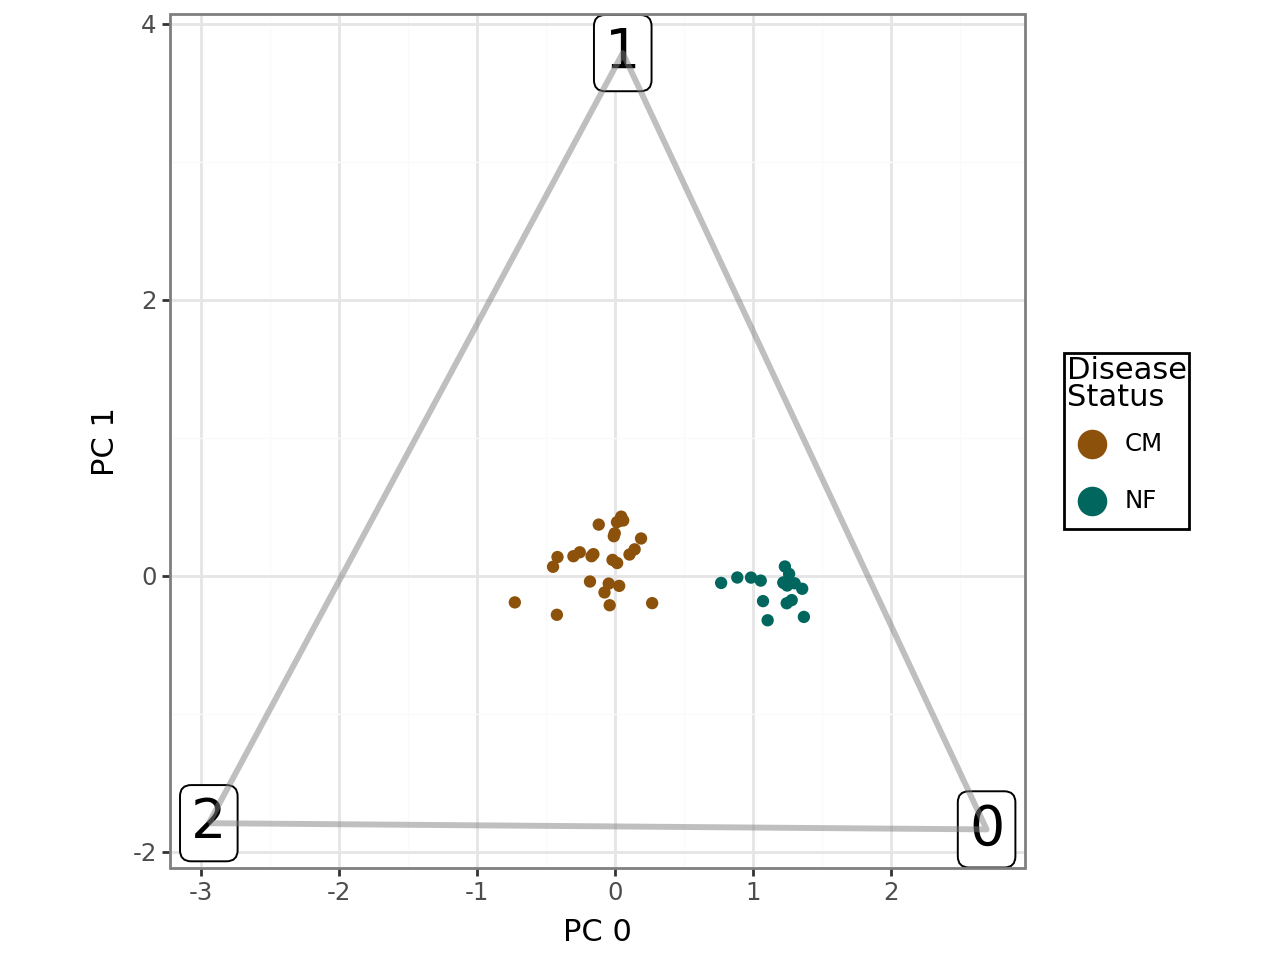

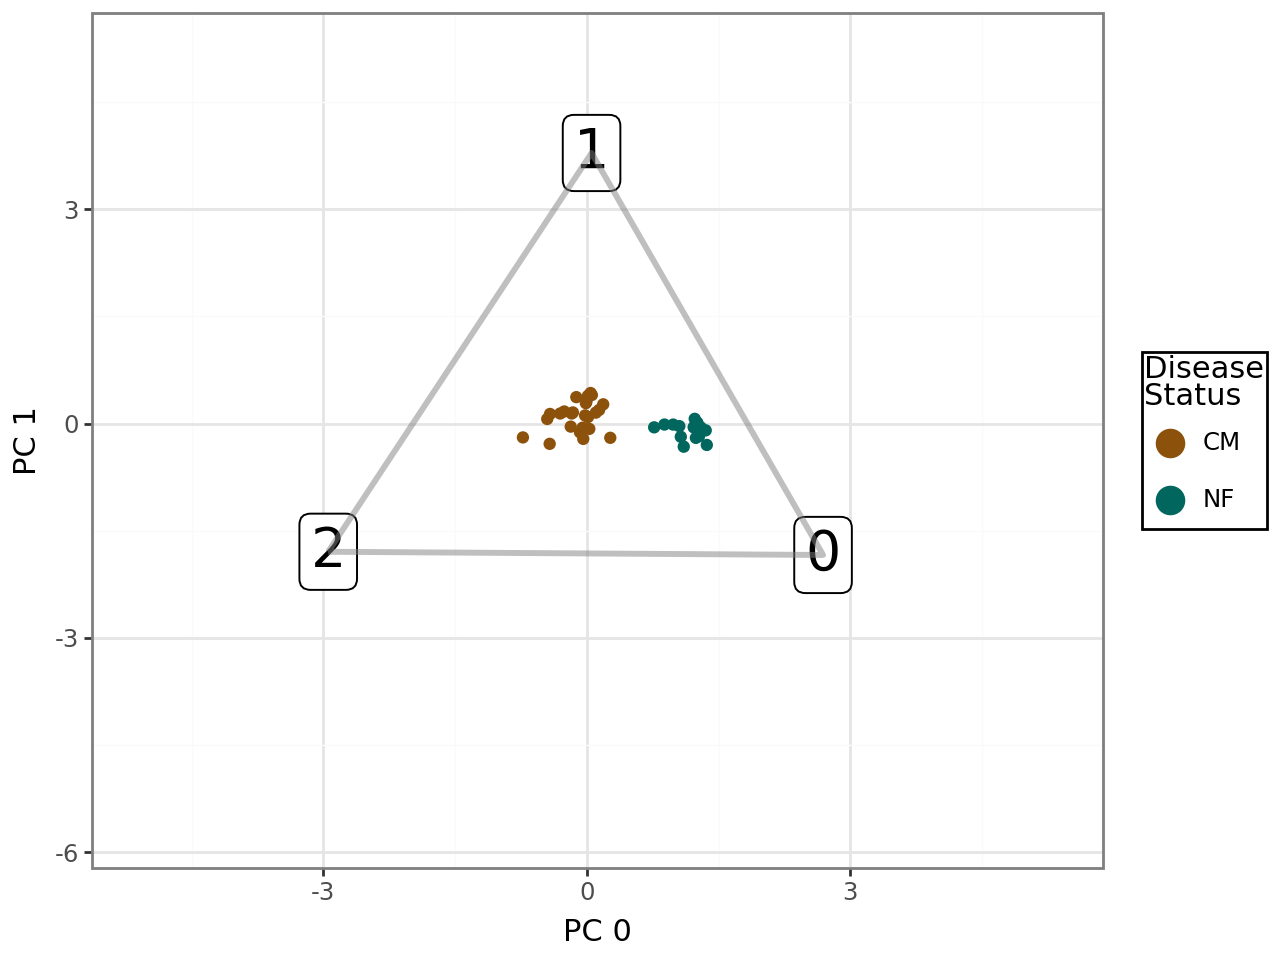

In [91]:
p = (
    (
        pn.ggplot()
        + pn.geom_point(data=obs_agg, mapping=pn.aes(x="pc_0", y="pc_1", color=y_col))
        + pn.geom_point(
            data=archetype_df,
            mapping=pn.aes(x="pc_0", y="pc_1"),
            color="grey",
            alpha=0.5,
            size=2,
        )
        + pn.geom_label(
            data=archetype_df,
            mapping=pn.aes(x="pc_0", y="pc_1", label="archetype"),
            color="black",
            fill="white",
            boxcolor="black",
            label_r=0.2,
            label_padding=0.2,
            label_size=0.7,
            size=20,
        )
    )
    + pn.theme_bw()
    + pn.guides(color=pn.guide_legend(override_aes={"alpha": 1.0, "size": 5}))
    + pn.scale_color_manual(values=color_dict)
    + pn.labs(x="PC 0", y="PC 1", color="Disease\nStatus")
    + pn.theme(
        legend_key=pn.element_rect(fill="white", color="white"),
        legend_background=pn.element_rect(fill="white", color="black"),
    )
    + pn.coord_equal()
)
if hull_df is not None:
    p += pn.geom_path(
        data=hull_df,
        mapping=pn.aes(x="pc_0", y="pc_1"),
        color="grey",
        size=1.2,
        alpha=0.5,
    )
p.save(figure_dir / "patient_pseudobulk_in_convex_hull.pdf", verbose=False)
p.show()

# now also save with the same limits as the single-cell scatter plot
p += pn.coord_cartesian(xlim=pc_0_limits, ylim=pc_1_limits) + pn.coord_equal()
p.save(figure_dir / "patient_pseudobulk_in_convex_hull_same_limits.pdf", verbose=False)
p.show()

In [ ]:
fig = p.draw()  # forces build + draw
ax = fig.axes[0]

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

x_limits, y_limits

((np.float64(-5.110331392288208), np.float64(5.3584412097930905)),
 (np.float64(-5.678097915649414), np.float64(5.203175735473633)))

In [79]:
p.layout

In [72]:
from plotnine.ggplot import ggplot_build

built = ggplot_build(p)

x_limits = built.layout.panel_params[0].x.range
y_limits = built.layout.panel_params[0].y.range
x_limits, y_limits

ImportError: cannot import name 'ggplot_build' from 'plotnine.ggplot' (/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/plotnine/ggplot.py)